# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 1, 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting loss score along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [1]:
#!pip3 install tensorflow keras

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import optimizers
from keras import utils
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)
utils.set_random_seed(7)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
# %matplotlib inline
# strategy = tf.distribute.MirroredStrategy()
from keras.utils.np_utils import to_categorical

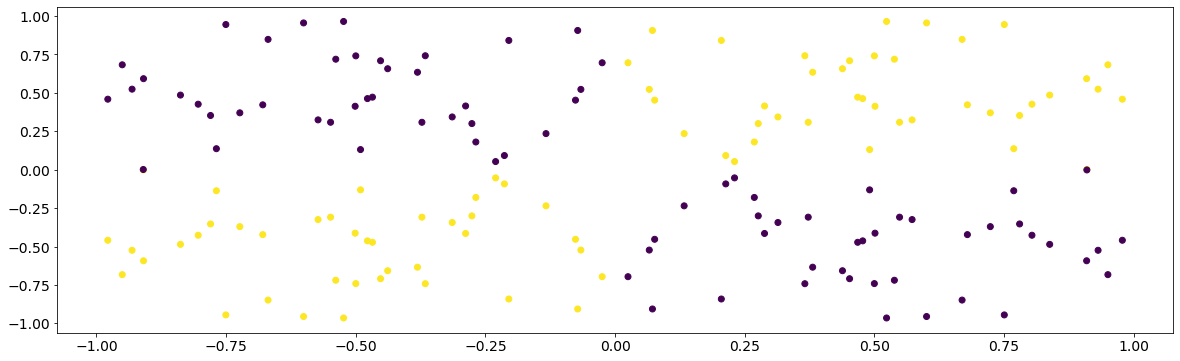

In [3]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)
plt.scatter(*zip(*X), c=y)

In [4]:
def train_model(X = X, y = y, neurons_hidden = 2, activation_fn = 'relu', optimizer = 'SGD', rand_seed = 27):
    np.random.seed(rand_seed)
    utils.set_random_seed(rand_seed)
    num_layers = [0,1,2,3,4,5]
    scores_loss = []
    scores_acc = []
    for num_layer in num_layers:
        print(f"Number of Hidden Layer(s): {num_layer} \n\n")
        model = Sequential()
        # Input layer
        model.add(Dense(2, input_dim = 2, activation = activation_fn))
        
        # Add hidden layer(s)
        for i in range(num_layer):
            if num_layer != 0:
                model.add(Dense(neurons_hidden, activation = activation_fn))
            
        # Output layer
        model.add(Dense(2, activation = activation_fn))
        
        # Build model
        if optimizer == 'SGD':
            exec(f"{str.lower(optimizer)} = optimizers.{str.upper(optimizer)}(learning_rate = 0.1)")
        else:
            exec(f"{str.lower(optimizer)} = optimizers.{str.title(optimizer)}(learning_rate = 0.1)")
        
        
        
        model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    
        if activation_fn in ['sigmoid', 'softmax']:
            labels = to_categorical(y, num_classes = 2)
        else:
            labels = y
        history = model.fit(X,labels,epochs = 400, batch_size = 10, verbose = 0)
        
        loss_values = history.history['loss']
        accuracy_values = history.history['accuracy']
        # loss_values = [math.log(l) for l in loss_values]
        epochs = list(range(1, len(loss_values)+1))
        scores_loss.append(loss_values)
        scores_acc.append(accuracy_values)
        
    # plot scores
    epochs = range(1,len(scores_loss[0])+1)
    plt.figure()
    for i in range(len(scores_loss)):
        plt.plot(epochs, scores_loss[i], label = f"{i}")
    plt.legend(title = "Number of Hidden Layer(s)",loc = "upper right")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{neurons_hidden} Neurons Per Hidden Layer")
    plt.show()
    plt.close()
    
    
    plt.figure()
    for i in range(len(scores_acc)):
        plt.plot(epochs, scores_acc[i], label = f"{i}")
    plt.legend(title = "Number of Hidden Layer(s)",loc = "lower left")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{neurons_hidden} Neurons Per Hidden Layer")
    plt.show()
    plt.close()
    


Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




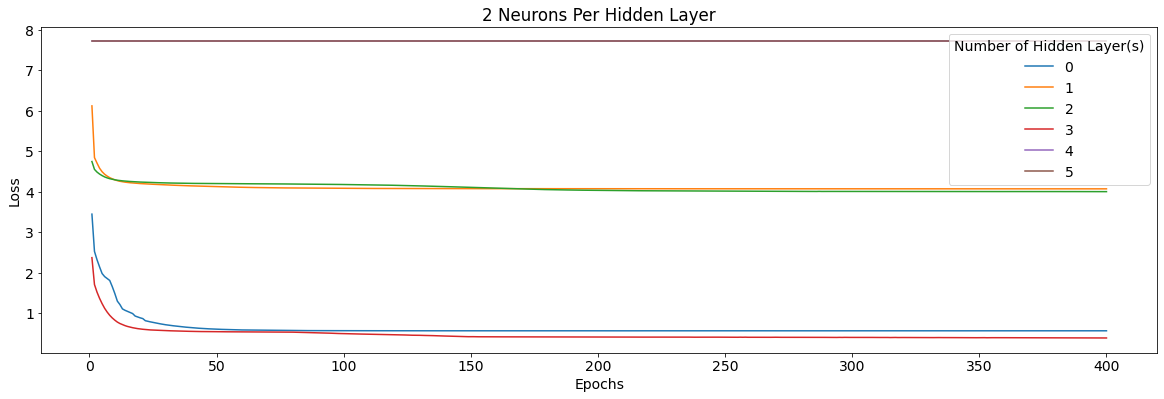

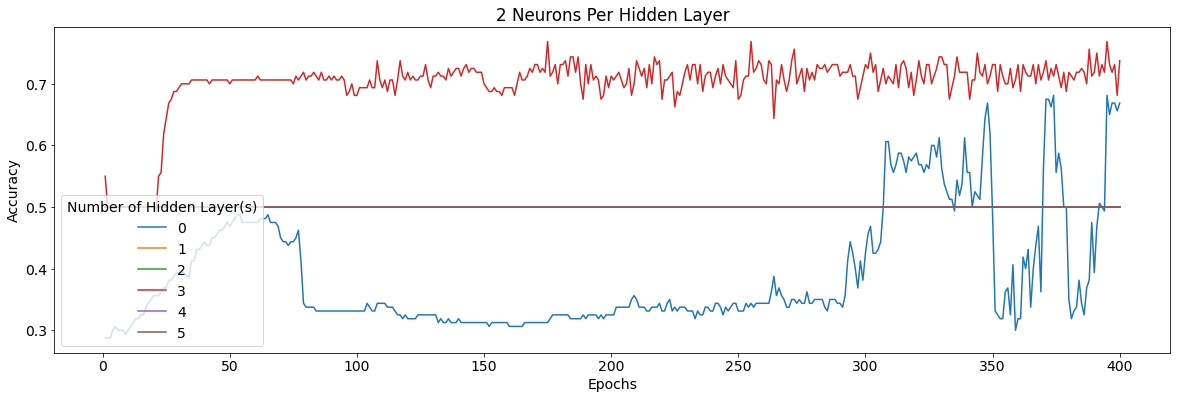

In [5]:
train_model()

Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




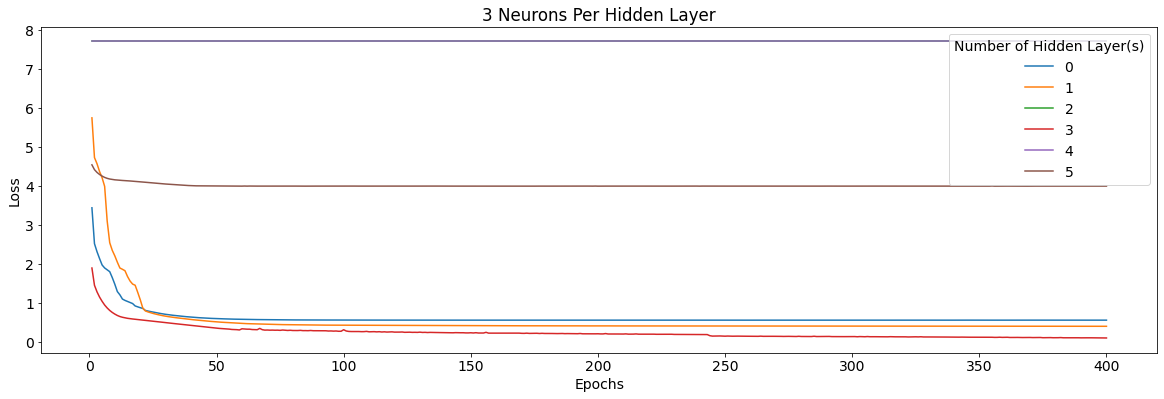

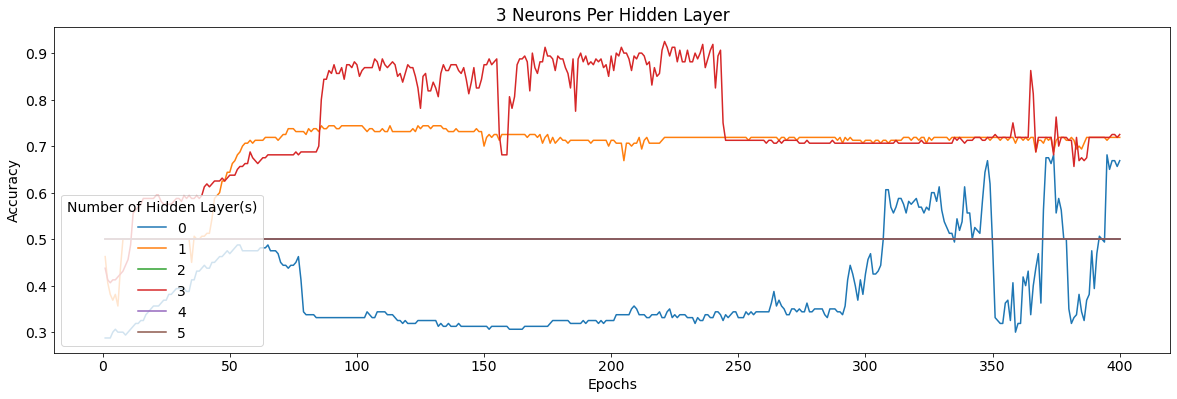

In [8]:
train_model(X = X, y = y, neurons_hidden=3)

Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




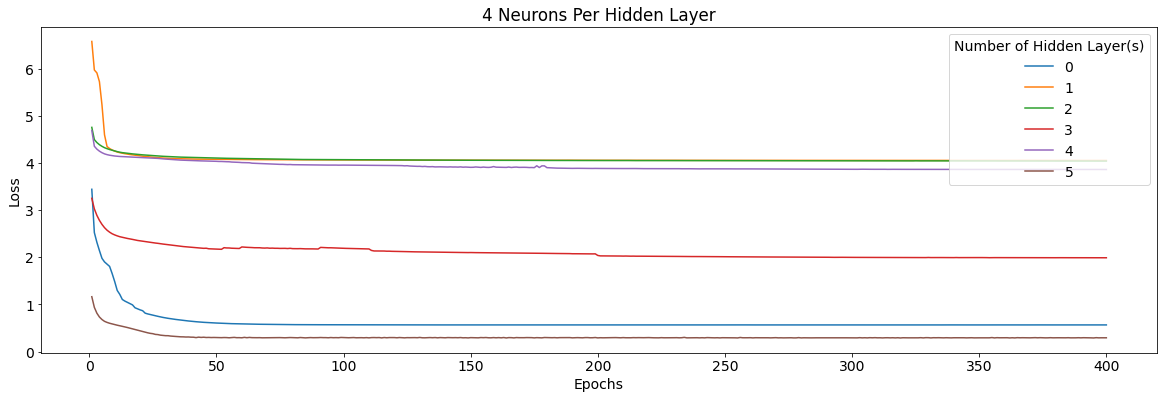

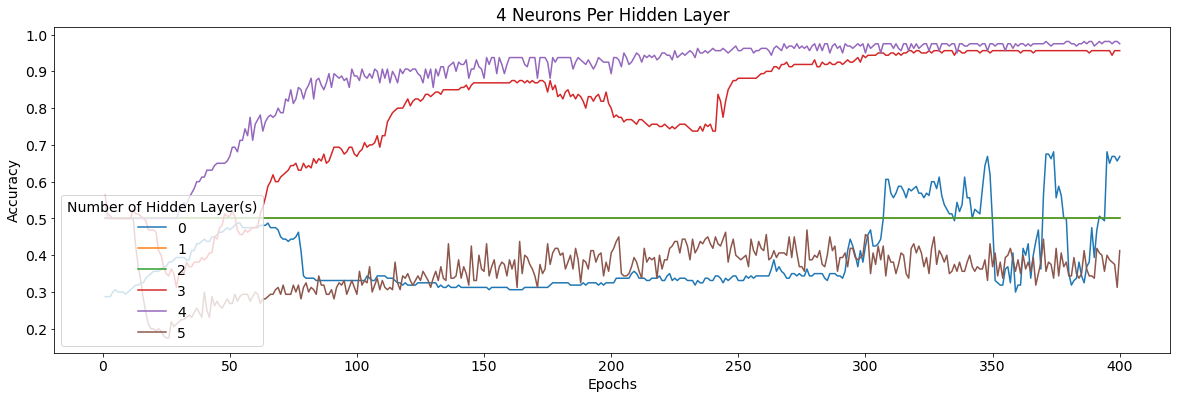

In [9]:
train_model(X = X, y = y, neurons_hidden=4)

Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




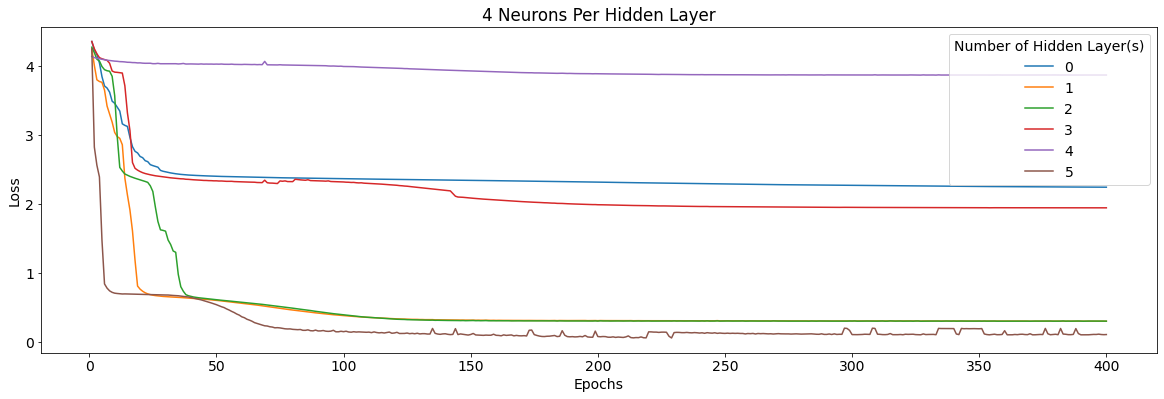

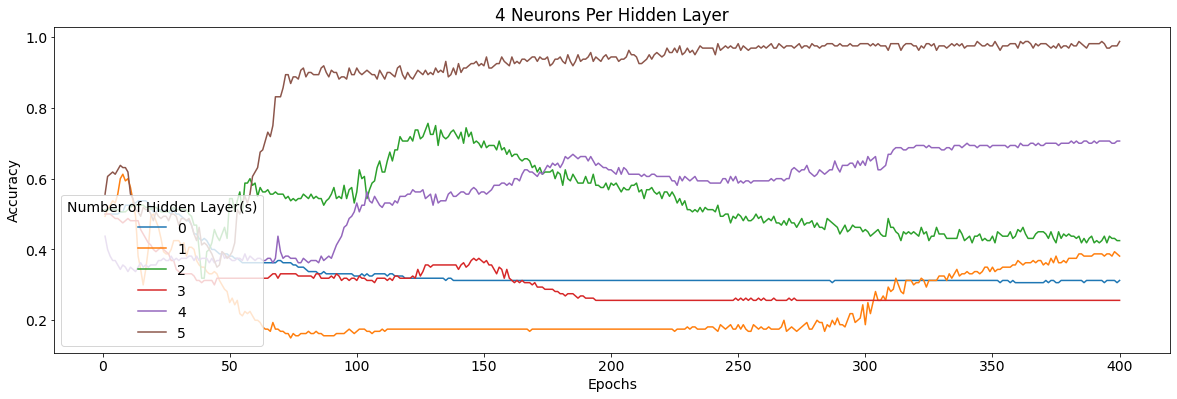

In [10]:
train_model(X = X, y = y, neurons_hidden=4, activation_fn = 'tanh')

Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




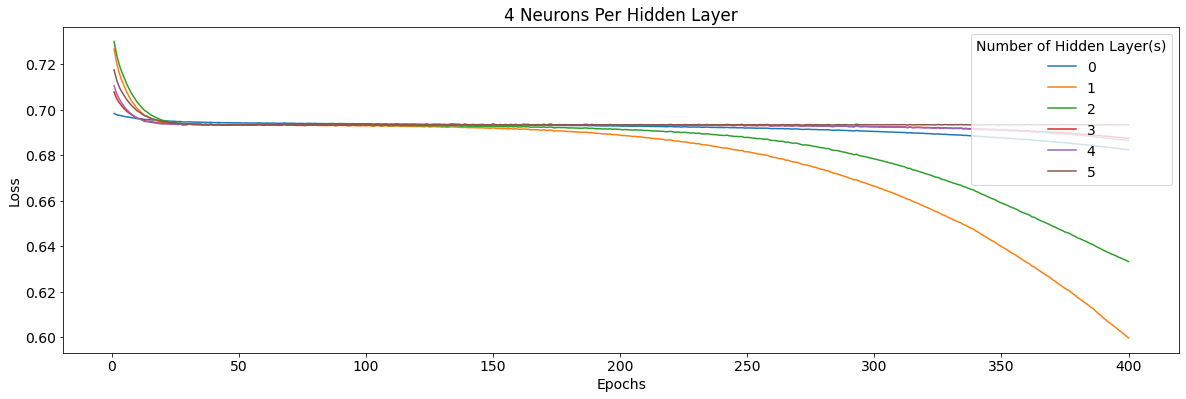

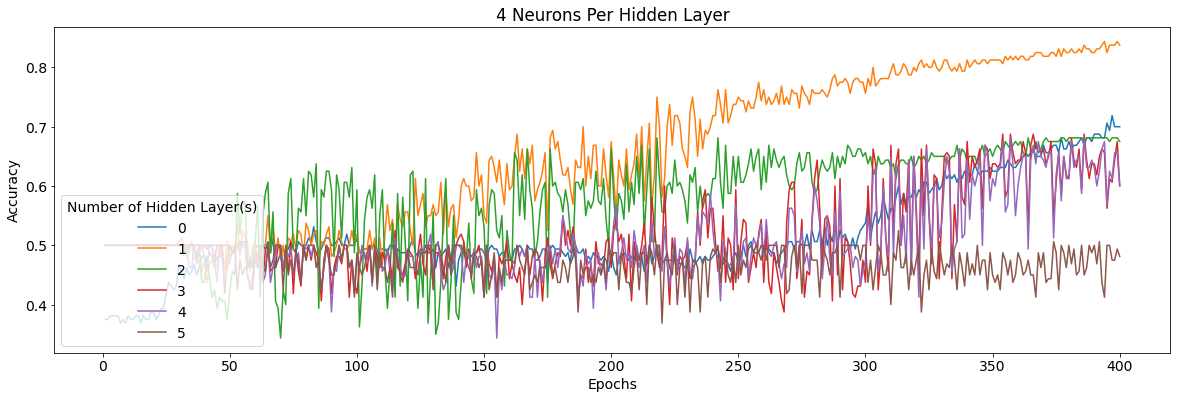

In [11]:
train_model(X = X, y = y, neurons_hidden=4, activation_fn =  'sigmoid')

Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




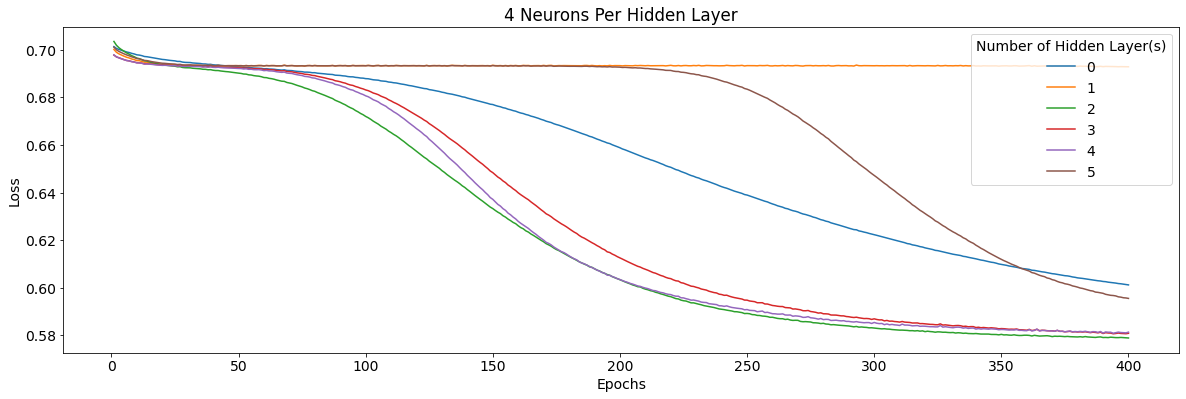

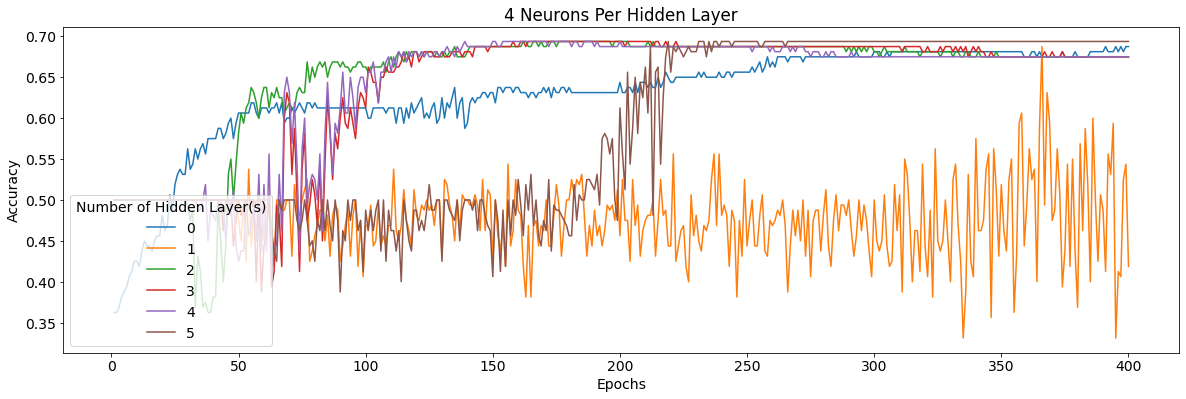

In [12]:
train_model(X = X, y = y, neurons_hidden=4,activation_fn =  'softmax')

Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




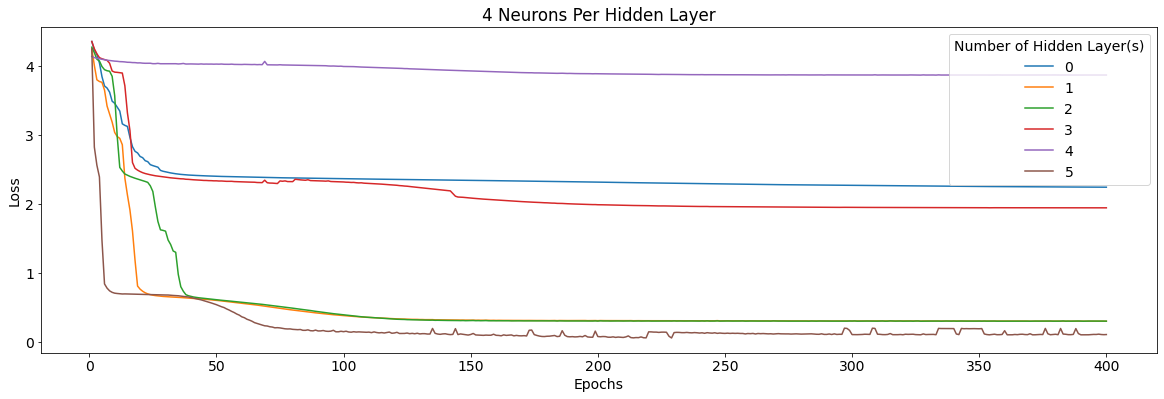

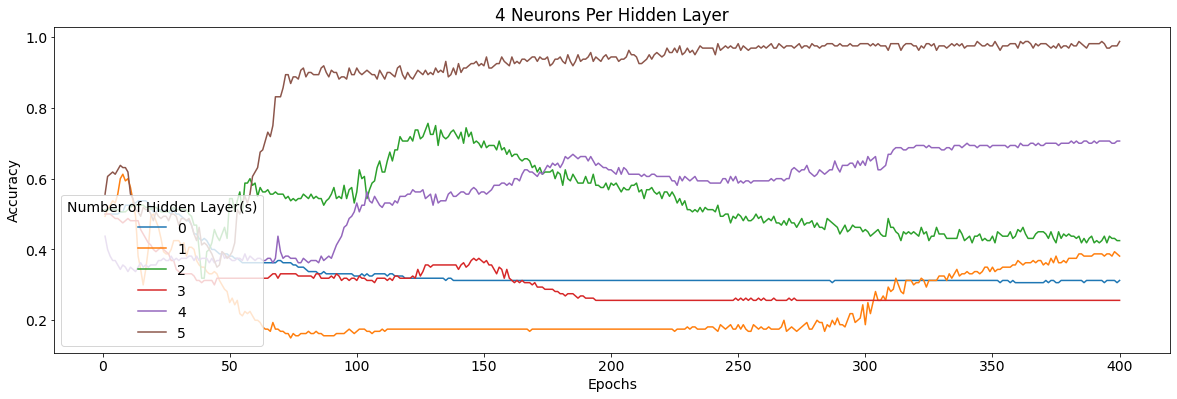

In [13]:
train_model(X = X, y = y, neurons_hidden=4, activation_fn='tanh',optimizer= 'adam')

Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




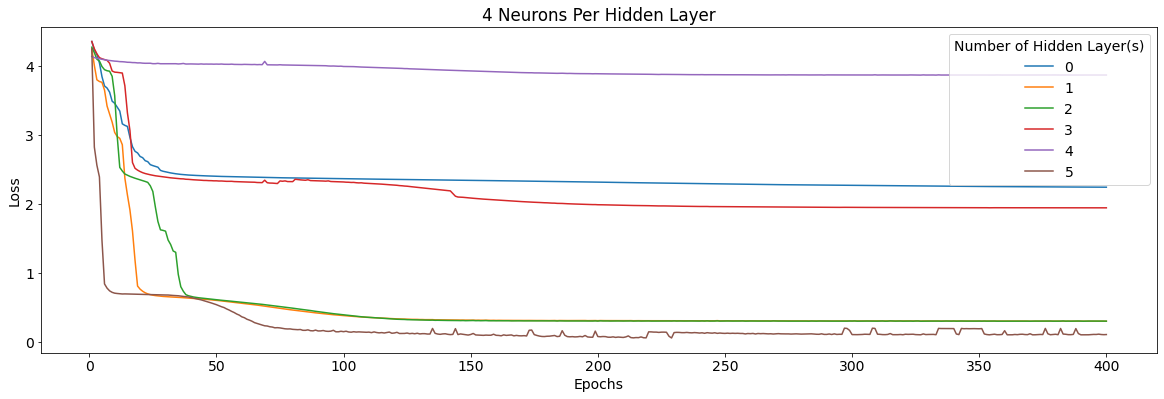

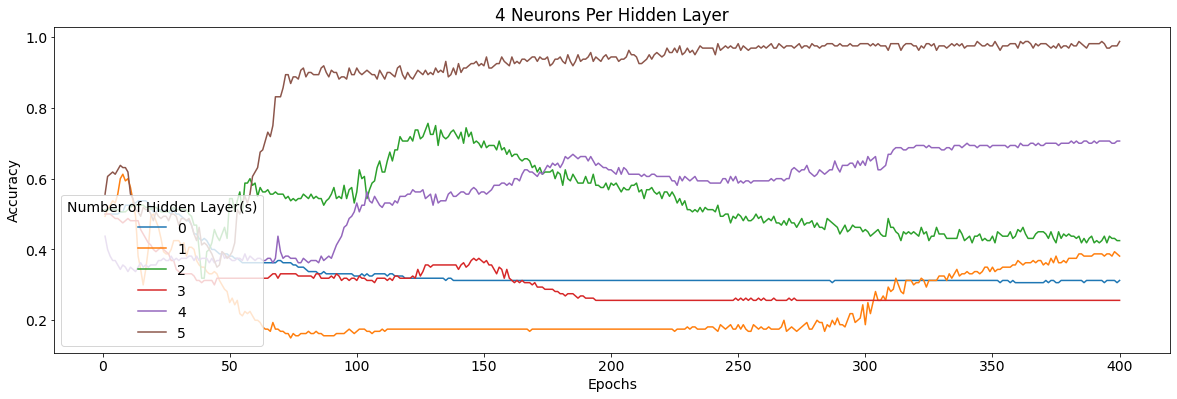

In [14]:
train_model(X = X, y = y, neurons_hidden=4,activation_fn= 'tanh',optimizer= 'adamax')

Number of Hidden Layer(s): 0 


Number of Hidden Layer(s): 1 


Number of Hidden Layer(s): 2 


Number of Hidden Layer(s): 3 


Number of Hidden Layer(s): 4 


Number of Hidden Layer(s): 5 




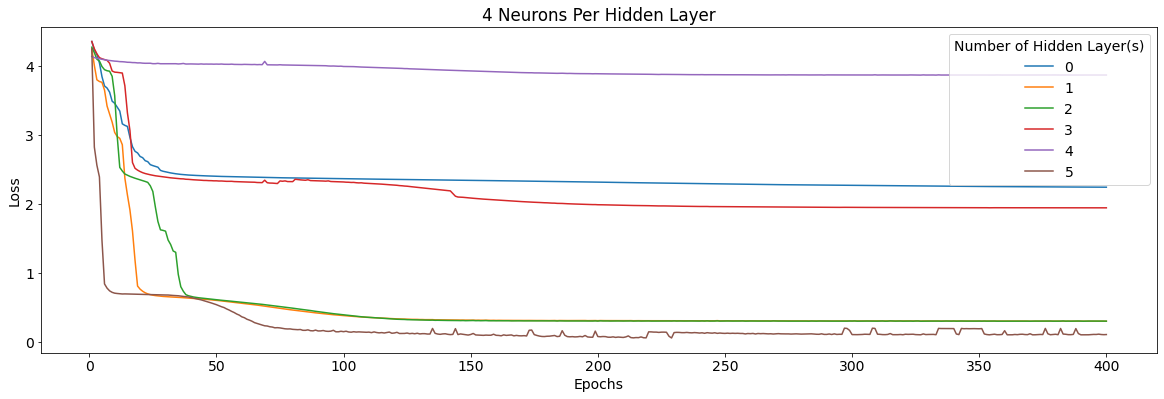

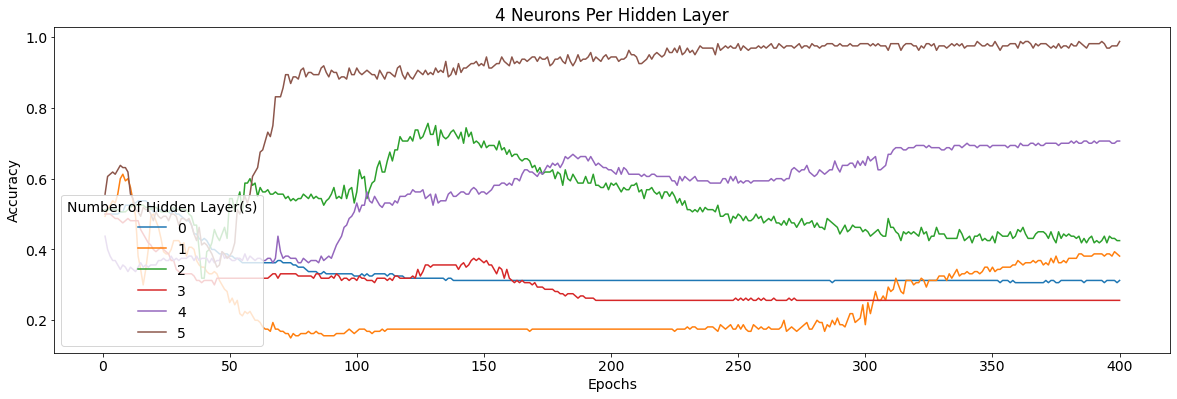

In [15]:
train_model(X = X, y = y, neurons_hidden=4,activation_fn= 'tanh',optimizer= 'adagrad')

### The interesting thing about the loss curves when using separate activation functions that require specific labels ('sigmoid' and 'softmax') is that the loss curves for every number of hidden layers seems to make a backward S shape, meaning that the loss curves start at their maximum, decrease significantly, stay constant for ~200 epochs and then decrease at varying rates until converging to a constant value around 400 epochs. The activation functions 'relu' and 'tanh' appeared to have similar shapes which shows varying degrees of decrease before eventually converging to the minimum loss value for those particular parameters. In general, I felt 'Adam' and 'Adamax' were the optimizers that performed the best in terms of the loss and accuracy curve.

# BYOD - Football 4th down conversion

In [18]:
df_orig = pd.read_csv("../w7/NFL Play by Play 2009-2018 (v5).csv")

C:\Users\gdlev\AppData\Local\Temp\ipykernel_23532\923472195.py:1: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv("../w7/NFL Play by Play 2009-2018 (v5).csv")


In [26]:
cols_include = [
    "posteam_type",
    "yardline_100",
    "quarter_seconds_remaining",
    "half_seconds_remaining",
    "game_seconds_remaining",
    "game_half",
    "drive",
    # "sp",
    "qtr",
    "down",
    "goal_to_go",
    "ydstogo",
    "play_type",
    "shotgun",
    "no_huddle",
    "posteam_timeouts_remaining",
    "defteam_timeouts_remaining",
    "score_differential",
    "fourth_down_converted"
]
df = df_orig[cols_include].dropna().copy()
df = df.loc[df.play_type.isin(['run', 'pass'])]
df = pd.concat([df.loc[df.fourth_down_converted == 1].sample(400), df.loc[df.fourth_down_converted == 0].sample(1200)], axis = 0)

In [29]:
df_X = df.drop('fourth_down_converted', axis = 1).copy()
cat_cols = list(df_X.dtypes[df_X.dtypes == 'object'].index)
scal = preprocessing.StandardScaler()
df_X[['yardline_100', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'goal_to_go','ydstogo', 'score_differential']] = scal.fit_transform(df_X[['yardline_100', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'goal_to_go','ydstogo', 'score_differential']])

df_X = pd.concat([df_X.drop(cat_cols, axis = 1), pd.get_dummies(df_X[cat_cols])], axis = 1).copy()
df_y = df[['fourth_down_converted']].copy()

Xtrain, Xtest, ytrain, ytest = train_test_split(df_X, df_y, train_size=0.7)



In [30]:
pca = PCA(n_components= 2, random_state=27)
X_train = pca.fit_transform(Xtrain)
X_test = pca.fit_transform(Xtest)
print(sum(pca.explained_variance_ratio_))

0.891170383926727


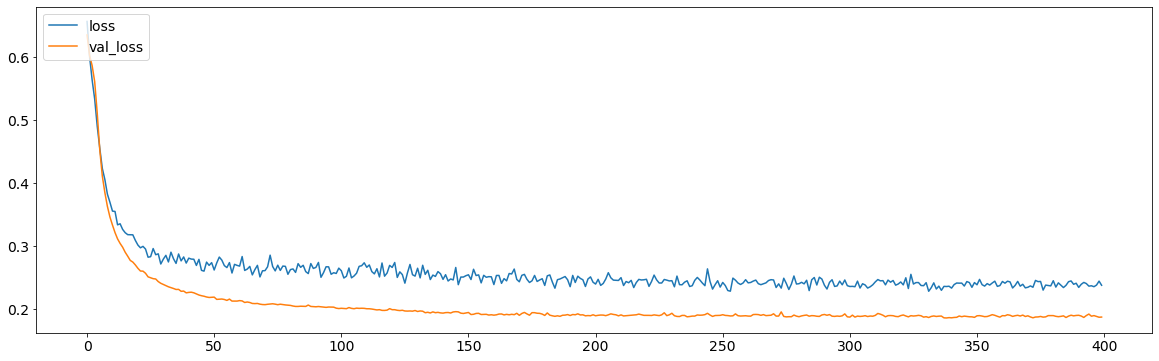

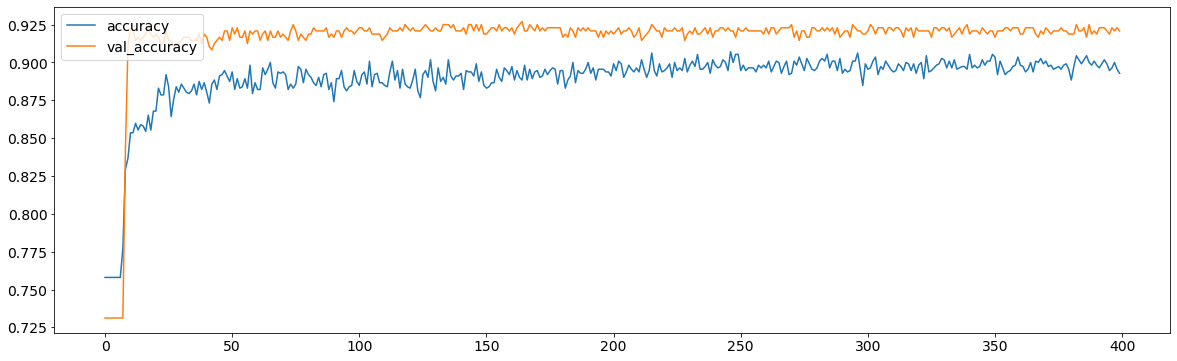

In [31]:
np.random.seed(27)
utils.set_random_seed(27)

model = Sequential()
# Input layer
model.add(Dense(2, input_dim = 2, activation = 'sigmoid'))

# Add hidden layer(s)
model.add(Dense(32, activation = 'softmax'))
model.add(Dense(32, activation = 'softmax'))
model.add(BatchNormalization())
model.add(Dense(32, activation = 'softmax'))
model.add(Dropout(0.2))
# model.add(Dense(8, activation = 'tanh', kernel_regularizer=regularizers.L1(0.01),activity_regularizer=regularizers.L2(0.01)))
# model.add(Dense(8, activation = 'relu', kernel_regularizer=regularizers.L1(0.01),activity_regularizer=regularizers.L2(0.01)))
    
# Output layer
model.add(Dense(2, activation = 'sigmoid'))

# Build model
optimizers.Adam(learning_rate=1e-2)

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# labels = ytrain
labels = to_categorical(ytrain, num_classes = 2)
labels_test = to_categorical(ytest, num_classes = 2)
history = model.fit(X_train,labels,epochs = 400, batch_size = 10, verbose = 0, validation_data=(X_test, labels_test), shuffle=True)

loss_values = history.history['loss']
accuracy_values = history.history['accuracy']
plt.figure()
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc = "upper left")
plt.show()
plt.close()

plt.figure()
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = "upper left")
plt.show()


https://datascience.stackexchange.com/questions/42657/what-are-the-possible-approaches-to-fixing-overfitting-on-a-cnn/42663#42663
https://machinelearningknowledge.ai/keras-dropout-layer-explained-for-beginners/#:~:text=How%20to%20use%20Dropout%20Layer%20in%20Keras%3F%201,be%20applied%20to%20the%20output%20layer.%20More%20items